# Introduction

This notebook obtains and scrubs data previously parsed in the Database-API-19 notebook, then preforms and exploratory data analysis of present and generated features to be used in modeling.

# Table of Contents<a id='Table of Contents'></a>

<a href='#Obtain the Data'>**1. Obtain the Data**</a>

<a href='#Scrub the Data'>**2. Scrub the Data**</a>

<a href='#Explore the Data'>**3. Explore the Data**</a>

<a href='#References'>**4. References**</a>

<a href='#Future Work'>**5. Future Work**</a>

# Obtain the Data<a id='Obtain the Data'></a>

In [1]:
# import data to study
import pandas as pd
df = pd.read_csv('all_protein_data_19.csv', index_col=0)
df.sample(5)

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,...,Accession Version,Organism,Definition,Division,Topology,Molecule Type,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
3777,Un,NT_187683.1,77816,88318,+,3805,KIR2DL4,NP_001074239.1,342,killer cell immunoglobulin-like receptor 2DL4 ...,...,NP_001074239.1,Homo sapiens,killer cell immunoglobulin-like receptor 2DL4 ...,PRI,linear,AA,34844,2,0,msmsptviilaclgffldqsvwahvggqdkpfcsawpsavvpqggh...
3205,Un,NT_187636.1,118931,132900,-,3802,KIR2DL1,NP_055033.2,348,killer cell immunoglobulin-like receptor 2DL1 ...,...,NP_055033.2,Homo sapiens,killer cell immunoglobulin-like receptor 2DL1 ...,PRI,linear,AA,36328,3,5,msllvvsmacvgffllqgawphegvhrkpsllahpgrlvkseetvi...
3726,Un,NT_187677.1,15493,27060,+,115653,KIR3DL3,NP_703144.3,410,killer cell immunoglobulin-like receptor 3DL3 ...,...,NP_703144.3,Homo sapiens,killer cell immunoglobulin-like receptor 3DL3 ...,PRI,linear,AA,42258,4,6,mslmvvsmacvgffllegpwphvggqdkpflsawpgtvvsegqhvt...
108252,19,NC_000019.10,55045074,55063032,-,112724,RDH13,NP_001139443.1,331,retinol dehydrogenase 13 isoform 1 precursor,...,NP_001139443.1,Homo sapiens,retinol dehydrogenase 13 isoform 1 precursor [...,PRI,linear,AA,34301,1,4,msryllplsalgtvagaavllkdyvtggacpskatipgktvivtga...
3592,Un,NT_187669.1,132975,144541,-,115653,KIR3DL3,NP_703144.3,410,killer cell immunoglobulin-like receptor 3DL3 ...,...,NP_703144.3,Homo sapiens,killer cell immunoglobulin-like receptor 3DL3 ...,PRI,linear,AA,42258,4,6,mslmvvsmacvgffllegpwphvggqdkpflsawpgtvvsegqhvt...


In [2]:
# import data to supplement about amino acids
amino_acid_info = pd.read_csv('Amino acid information.csv')
amino_acid_info.head()

,Amino Acid,Abbreviation,Symbol,Weight
0,Alanine,Ala,A,89
1,Arginine,Arg,R,174
2,Asparagine,Asn,N,132
3,Aspartic acid,Asp,D,133
4,Cysteine,Cys,C,121


In [3]:
amino_acid_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
Amino Acid      21 non-null object
Abbreviation    21 non-null object
Symbol          21 non-null object
Weight          21 non-null int64
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


<a href='#Obtain the Data'>Back to section Obtain the Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# Scrub the Data<a id='Scrub the Data'></a>

<a href='#Initial column check'>2.1 Initial Column Check</a>

<a href='#Initial Data Drop'>2.2 Initial Data Drop</a>

<a href='#Check for nans'>2.3 Check for 'Not a Number's</a>

<a href='#Check for duplicated rows'> 2.4 Check for Duplicated Rows</a>

<a href='#Evaluate index'>2.5 Evaluate Index</a>

<a href='#Evaluate object data'>2.6 Evaluate Object Data</a>

## Initial column check<a id='Initial column check'></a>

In [4]:
# check column names
df.columns

Index(['#Replicon Name', 'Replicon Accession', 'Start', 'Stop', 'Strand',
       'GeneID', 'Locus', 'Protein product', 'Length', 'Protein name',
       '# Sequence-Name', 'Sequence-Role', 'Assigned-Molecule',
       'Assigned-Molecule-Location/Type', 'GenBank-Accn', 'Relationship',
       'RefSeq-Accn', 'Assembly-Unit', 'Sequence-Length', 'UCSC-style-name',
       'Chromosome', 'Accession Version', 'Organism', 'Definition', 'Division',
       'Topology', 'Molecule Type', 'Molecular Weight', 'Number of Regions',
       'Number of Binding Sites', 'Sequence'],
      dtype='object')

In [5]:
# check column Assigned-Molecule unique values
df['Assigned-Molecule'].unique()

array([19], dtype=int64)

In [6]:
# check column Organism unique values
df['Organism'].unique()

array(['Homo sapiens'], dtype=object)

In [7]:
# check column #Replicon Name unique values
df['#Replicon Name'].unique()

array(['19', 'Un'], dtype=object)

In [8]:
# check column Replicon Accession unique values
df['Replicon Accession'].unique()

array(['NC_000019.10', 'NT_187622.1', 'NT_187621.1', 'NW_021160022.1',
       'NW_003315962.1', 'NW_003315964.2', 'NW_003315965.1',
       'NW_003315963.1', 'NT_187619.1', 'NW_014040929.1',
       'NW_009646206.1', 'NT_187620.1', 'NW_003571054.1',
       'NW_003571055.2', 'NW_003571056.2', 'NW_003571057.2',
       'NW_003571058.2', 'NW_003571059.2', 'NW_003571060.1',
       'NW_016107300.1', 'NW_016107301.1', 'NW_016107302.1',
       'NW_016107303.1', 'NW_016107304.1', 'NW_016107305.1',
       'NW_016107306.1', 'NW_016107307.1', 'NW_016107308.1',
       'NW_016107309.1', 'NW_016107311.1', 'NW_016107312.1',
       'NW_016107313.1', 'NW_016107314.1', 'NT_187636.1', 'NT_187637.1',
       'NT_187638.1', 'NT_187639.1', 'NT_187640.1', 'NT_187641.1',
       'NT_187642.1', 'NT_187643.1', 'NT_187644.1', 'NT_187645.1',
       'NT_187668.1', 'NT_187669.1', 'NT_187670.1', 'NT_187671.1',
       'NT_187672.1', 'NT_187673.1', 'NT_187674.1', 'NT_187675.1',
       'NT_187676.1', 'NT_187677.1', 'NT_1876

In [9]:
# check column Chromosome unique values
df['Chromosome'].unique()

array([19], dtype=int64)

In [10]:
# check column Division unique values
df['Division'].unique()

array(['PRI'], dtype=object)

In [11]:
# check column Topology unique values
df['Topology'].unique()

array(['linear'], dtype=object)

In [12]:
# check column Molecule type unique values
df['Molecule Type'].unique()

array(['AA'], dtype=object)

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Initial data drop<a id='Initial Data Drop'></a>

In [13]:
# dropping columns of data to drop either due to only one unique value or human classifier that isn't useful to this project
to_drop = ['Organism', 'Replicon Accession', 'Chromosome', 'Division', 'Definition', 'Topology', 
           'Molecule Type', 'Assigned-Molecule', 'Assigned-Molecule-Location/Type', 'GenBank-Accn', 'Relationship']
df = df.drop(to_drop, axis=1)
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,Sequence-Role,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name,Accession Version,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
3291,Un,2326,18567,-,3812,KIR3DL2,NP_001229796.1,438,killer cell immunoglobulin-like receptor 3DL2 ...,HSCHR19KIR_LUCE_A_HAP_CTG3_1,alt-scaffold,NT_187643.1,ALT_REF_LOCI_17,170698.0,chr19_KI270889v1_alt,NP_001229796.1,46277,4,4,msltvvsmacvgffllqgawplmggqdkpflsarpstvvprgghva...
3250,Un,11622,25435,-,3809,KIR2DS4,NP_001268901.1,222,killer cell immunoglobulin-like receptor 2DS4 ...,HSCHR19KIR_G248_BA2_HAP_CTG3_1,alt-scaffold,NT_187640.1,ALT_REF_LOCI_14,204239.0,chr19_KI270886v1_alt,NP_001268901.1,21829,2,5,mslmviimacvgffllqgawpqegvhrkpsflalpghlvkseetvi...
3204,Un,88630,99098,-,3805,KIR2DL4,NP_002246.5,377,killer cell immunoglobulin-like receptor 2DL4 ...,HSCHR19KIR_FH15_B_HAP_CTG3_1,alt-scaffold,NT_187636.1,ALT_REF_LOCI_10,248807.0,chr19_KI270882v1_alt,NP_002246.5,38974,3,0,msmsptviilaclgffldqsvwahvggqdkpfcsawpsavvpqggh...
108454,19,56221575,56225046,-,79149,ZSCAN5A,NP_001309005.1,495,zinc finger and SCAN domain-containing protein...,19,assembled-molecule,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_001309005.1,55632,11,7,maanctsswslgescnrpglelprsmassetqlgnhdvdpeishvn...
3316,Un,146765,158365,-,115653,KIR3DL3,NP_703144.3,410,killer cell immunoglobulin-like receptor 3DL3 ...,HSCHR19KIR_LUCE_BDEL_HAP_CTG3_1,alt-scaffold,NT_187644.1,ALT_REF_LOCI_18,184499.0,chr19_KI270890v1_alt,NP_703144.3,42258,4,6,mslmvvsmacvgffllegpwphvggqdkpflsawpgtvvsegqhvt...


<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Check for nans<a id='Check for nans'></a>

In [14]:
# check for nans
print(len(df))
df.isna().sum()

27581


#Replicon Name             0
Start                      0
Stop                       0
Strand                     0
GeneID                     0
Locus                      0
Protein product            0
Length                     0
Protein name               0
# Sequence-Name            0
Sequence-Role              0
RefSeq-Accn                0
Assembly-Unit              0
Sequence-Length            0
UCSC-style-name            0
Accession Version          0
Molecular Weight           0
Number of Regions          0
Number of Binding Sites    0
Sequence                   0
dtype: int64

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Check for duplicated rows<a id='Check for duplicated rows'></a>

In [15]:
# check for duplicated rows
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 19600


In [16]:
# code to drop duplicated rows
df.drop_duplicates(inplace=True)
print('duplicated rows: ' + str(df.duplicated().sum()))
print(len(df))

duplicated rows: 0
7981


<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Evaluate index<a id='Evaluate index'></a>

In [17]:
# check the index 
df.index

Int64Index([102114, 102115, 102116, 102117, 102118, 102119, 102120, 102121,
            102122, 102123,
            ...
              4523,   4524,   4525,   4582,   4641,   4701,   4702,   4703,
              4704,   4728],
           dtype='int64', length=7981)

In [18]:
# update the index
index_list = []
for i in range(0, len(df.index)):
    index_list.append(i)
df.index = index_list
df.head()

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,Sequence-Role,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name,Accession Version,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
0,19,110679,111596,+,81099,OR4F17,NP_001005240.1,305,olfactory receptor 4F17,19,assembled-molecule,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_001005240.1,34081,2,7,mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsds...
1,19,281388,291336,-,8612,PLPP2,XP_011526698.1,294,phospholipid phosphatase 2 isoform X1,19,assembled-molecule,NC_000019.10,Primary Assembly,58617616.0,chr19,XP_011526698.1,33015,1,1,mqrrwvfvlldvlcllvgfssppaslpfailtlvnapykrgfycgd...
2,19,281388,291066,-,8612,PLPP2,NP_808211.1,309,phospholipid phosphatase 2 isoform 3,19,assembled-molecule,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_808211.1,34262,1,1,mgvargpgsrgqhppprqqevcaegprarlhpappglgaslpfail...
3,19,281388,288055,-,8612,PLPP2,NP_803545.1,232,phospholipid phosphatase 2 isoform 2,19,assembled-molecule,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_803545.1,25972,1,1,magvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtf...
4,19,281388,291336,-,8612,PLPP2,NP_003703.1,288,phospholipid phosphatase 2 isoform 1,19,assembled-molecule,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_003703.1,32443,1,8,mqrrwvfvlldvlcllvaslpfailtlvnapykrgfycgddsiryp...


<a href='#Scrub the Data'>Back to section Scrub the Index</a>

## Evaluate object data<a id='Evaluate object data'></a>

In [19]:
# check the data types for each column of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 20 columns):
#Replicon Name             7981 non-null object
Start                      7981 non-null int64
Stop                       7981 non-null int64
Strand                     7981 non-null object
GeneID                     7981 non-null int64
Locus                      7981 non-null object
Protein product            7981 non-null object
Length                     7981 non-null int64
Protein name               7981 non-null object
# Sequence-Name            7981 non-null object
Sequence-Role              7981 non-null object
RefSeq-Accn                7981 non-null object
Assembly-Unit              7981 non-null object
Sequence-Length            7981 non-null float64
UCSC-style-name            7981 non-null object
Accession Version          7981 non-null object
Molecular Weight           7981 non-null int64
Number of Regions          7981 non-null int64
Number of Binding Sites    7981 no

In [20]:
# check the contents of the object data #Replicon Name
df['#Replicon Name'].unique()

array(['19', 'Un'], dtype=object)

In [21]:
# check the contents of the object data Strand
strand_options = df['Strand'].unique()
strand_options

array(['+', '-'], dtype=object)

In [22]:
# update the contents of the Strand data
new_strands = []
for i in range(0, len(df['Strand'])):
    if df['Strand'][i] == strand_options[0]:
        new_strands.append('positive')
    else:
        new_strands.append('negative')
print(len(new_strands))
df['Strand'] = new_strands
df['Strand'].unique()

7981


array(['positive', 'negative'], dtype=object)

In [23]:
# check the contents of the object data Locus
df['Locus'][0]

'OR4F17'

In [24]:
# determine the number of unique Loci in dataset, as this is the target variable
len(df['Locus'].unique())

1414

In [25]:
# check the contents of the object data Protein product
df['Protein product'][0]

'NP_001005240.1'

In [26]:
# check the contents of the object data Protein name
df['Protein name'][0]

'olfactory receptor 4F17'

In [27]:
# check the number of unique Protein name to see if this is a good unique identifier for the dataset
len(df['Protein name'].unique())

5170

In [28]:
# check the contents of the object data # Sequence-Name
df['# Sequence-Name'][0]

'19'

In [29]:
# check the number of unique # Sequence-Name to see if this is a good alternative classifier for the dataset
len(df['# Sequence-Name'].unique())

60

In [30]:
# check the contents of the object data Sequence-Role
df['Sequence-Role'][0]

'assembled-molecule'

In [31]:
# check the number of unique Sequence-Role to see if this is a good alternative classifier for the dataset
df['Sequence-Role'].unique()

array(['assembled-molecule', 'alt-scaffold', 'fix-patch', 'novel-patch'],
      dtype=object)

In [32]:
# check the contents of the object data Assembly-Unit
df['Assembly-Unit'][0]

'Primary Assembly'

In [33]:
# check the number of unique Assembly-Unit to see if this is a good alternative classifier for the dataset
df['Assembly-Unit'].unique()

array(['Primary Assembly', 'ALT_REF_LOCI_1', 'PATCHES', 'ALT_REF_LOCI_2',
       'ALT_REF_LOCI_3', 'ALT_REF_LOCI_4', 'ALT_REF_LOCI_5',
       'ALT_REF_LOCI_6', 'ALT_REF_LOCI_7', 'ALT_REF_LOCI_10',
       'ALT_REF_LOCI_11', 'ALT_REF_LOCI_12', 'ALT_REF_LOCI_13',
       'ALT_REF_LOCI_14', 'ALT_REF_LOCI_15', 'ALT_REF_LOCI_16',
       'ALT_REF_LOCI_17', 'ALT_REF_LOCI_18', 'ALT_REF_LOCI_19',
       'ALT_REF_LOCI_20', 'ALT_REF_LOCI_21', 'ALT_REF_LOCI_22',
       'ALT_REF_LOCI_23', 'ALT_REF_LOCI_24', 'ALT_REF_LOCI_25',
       'ALT_REF_LOCI_26', 'ALT_REF_LOCI_27', 'ALT_REF_LOCI_28',
       'ALT_REF_LOCI_29', 'ALT_REF_LOCI_30', 'ALT_REF_LOCI_31',
       'ALT_REF_LOCI_32', 'ALT_REF_LOCI_33', 'ALT_REF_LOCI_34',
       'ALT_REF_LOCI_35'], dtype=object)

In [34]:
# check the contents of the object data UCSC-style-name
df['UCSC-style-name'][0]

'chr19'

In [35]:
# check the number of unique UCSC-style-name to see if this is a good alternative classifier for the dataset
df['UCSC-style-name'].unique()

array(['chr19', 'chr19_KI270868v1_alt', 'chr19_KI270865v1_alt', 'na',
       'chr19_GL383573v1_alt', 'chr19_GL383575v2_alt',
       'chr19_GL383576v1_alt', 'chr19_GL383574v1_alt',
       'chr19_KI270866v1_alt', 'chr19_KI270867v1_alt',
       'chr19_GL949746v1_alt', 'chr19_GL949747v2_alt',
       'chr19_GL949748v2_alt', 'chr19_GL949749v2_alt',
       'chr19_GL949750v2_alt', 'chr19_GL949751v2_alt',
       'chr19_GL949752v1_alt', 'chr19_KI270882v1_alt',
       'chr19_KI270883v1_alt', 'chr19_KI270884v1_alt',
       'chr19_KI270885v1_alt', 'chr19_KI270886v1_alt',
       'chr19_KI270887v1_alt', 'chr19_KI270888v1_alt',
       'chr19_KI270889v1_alt', 'chr19_KI270890v1_alt',
       'chr19_KI270891v1_alt', 'chr19_KI270914v1_alt',
       'chr19_KI270915v1_alt', 'chr19_KI270916v1_alt',
       'chr19_KI270917v1_alt', 'chr19_KI270918v1_alt',
       'chr19_KI270919v1_alt', 'chr19_KI270920v1_alt',
       'chr19_KI270921v1_alt', 'chr19_KI270922v1_alt',
       'chr19_KI270923v1_alt', 'chr19_KI270929v1_a

In [36]:
# check the object data Accession Version
df['Accession Version'][0]

'NP_001005240.1'

In [37]:
# check the number of unique Accession Version to see if this is a good unique identifier for the dataset
len(df['Accession Version'].unique())

6749

In [38]:
# check the contents of the object data Sequence
df['Sequence'][0]

'mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsdshlhspmyfllanlslidlslssvtapkmitdffsqrkvisfkgclvqifllhffggsemviliamgfdryiaickplhyttimcgnacvgimavawgigflhsvsqlafavhlpfcgpnevdsfycdlprviklactdtyrldimviansgvltvcsfvlliisytiilmtiqhrpldksskalstltahitvvllffgpcvfiyawpfpiksldkflavfysvitpllnpiiytlrnkdmktairqlrkwdahssvkf'

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# Explore the Data<a id='Explore the Data'></a>

<a href='#Initial Observations'>3.1 Initial Observations</a>

<a href='#Feature Development'>3.2 Feature Development</a>

<a href='#Number of Amino Acids'>3.2.1 Number of Amino Acids Feature Development</a>

<a href='#Length of Amino Acids and Molecular Weight Feature Development'>3.2.2 Length of Amino Acids and Molecular Weight Feature Development</a>

<a href='#Amino Acid Weight Feature Development'>3.2.3 Amino Acid Weight Feature Development</a>

<a href='#Additional Squared and Cubed Values'>3.2.4 Additional Squared and Cubed Values</a>

## Initial Observations<a id='Initial Observations'></a>

In [39]:
# initial basic statistics of continuous data
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000


In [40]:
# initial visualization of data
pd.plotting.scatter_matrix(df, figsize=(20,20));

In [41]:
# value counts for target variable
import numpy as np
values, counts = np.unique(df['Locus'], return_counts=True)
locus_info = pd.DataFrame()
locus_info['Locus'] = values
locus_info['Occurances in Chromosome 19'] = counts
locus_info.nlargest(20, columns='Occurances in Chromosome 19')

,Locus,Occurances in Chromosome 19
504,KIR3DL2,94
338,FCAR,91
495,KIR2DL4,91
679,NCR1,83
501,KIR2DS4,63
499,KIR2DS2,61
127,CARD8,51
909,RPS9,49
748,OSCAR,48
1194,ZNF266,46


<a href='#Explore the Data'>Back to section Explore the Data</a>

## Feature Development<a id='Feature Development'></a>

<a href='#Number of Amino Acids'>Number of Amino Acids</a>

<a href='#Length of Amino Acids and Molecular Weight Feature Development'>Length of Amino Acids and Molecular Weight Feature Development</a>

<a href='#Amino Acid Weight Feature Development'>Amino Acid Weight Feature Development</a>

<a href='#Additional Squared and Cubed Values'>Additional Squared and Cubed Values</a>

### Number of Amino Acids<a id='Number of Amino Acids'></a>

![amino acid naming convention](Amino-Acid-Codes.png)

In [42]:
# amino acid feature development
Alanines = []
Arginines = []
Asparagines = []
Aspartic_acids = []
Cysteines = []
Glutamic_acids = []
Glutamines = []
Glycines = []
Histidines = []
Isoleucines = []
Leucines = []
Lysines = []
Methionines = []
Phenylalanines = []
Prolines = []
Selenocysteines = []
Serines = []
Threonines = []
Tryptophans = []
Tyrosines = []
Valines = []
for sequence in df['Sequence']:
    Alanine = 0
    Arginine = 0
    Asparagine = 0
    Aspartic_acid = 0
    Cysteine = 0
    Glutamic_acid = 0
    Glutamine = 0
    Glycine = 0
    Histidine = 0
    Isoleucine = 0
    Leucine = 0
    Lysine = 0
    Methionine = 0
    Phenylalanine = 0
    Proline = 0
    Selenocysteine = 0
    Serine = 0
    Threonine = 0
    Tryptophan = 0
    Tyrosine = 0
    Valine = 0
    for letter in sequence:
        if letter == 'a':
            Alanine += 1
        elif letter == 'r':
            Arginine += 1
        elif letter == 'n':
            Asparagine += 1
        elif letter == 'd':
            Aspartic_acid += 1
        elif letter == 'c':
            Cysteine += 1
        elif letter == 'e':
            Glutamic_acid += 1
        elif letter == 'q':
            Glutamine += 1
        elif letter == 'g':
            Glycine += 1
        elif letter == 'h':
            Histidine += 1
        elif letter == 'i':
            Isoleucine += 1
        elif letter == 'l':
            Leucine += 1
        elif letter == 'k':
            Lysine += 1
        elif letter == 'm':
            Methionine += 1
        elif letter == 'f':
            Phenylalanine += 1
        elif letter == 'p':
            Proline += 1
        elif letter == 'u':
            Selenocysteine += 1
        elif letter == 's':
            Serine += 1
        elif letter == 't':
            Threonine += 1
        elif letter == 'w':
            Tryptophan += 1
        elif letter == 'y':
            Tyrosine += 1
        elif letter == 'v':
            Valine += 1
        else:
            print('please revise amino acid list')
            print(letter)
    Alanines.append(Alanine)
    Arginines.append(Arginine)
    Asparagines.append(Asparagine)
    Aspartic_acids.append(Aspartic_acid)
    Cysteines.append(Cysteine)
    Glutamic_acids.append(Glutamic_acid)
    Glutamines.append(Glutamine)
    Glycines.append(Glycine)
    Histidines.append(Histidine)
    Isoleucines.append(Isoleucine)
    Leucines.append(Leucine)
    Lysines.append(Lysine)
    Methionines.append(Methionine)
    Phenylalanines.append(Phenylalanine)
    Prolines.append(Proline)
    Selenocysteines.append(Selenocysteine)
    Serines.append(Serine)
    Threonines.append(Threonine)
    Tryptophans.append(Tryptophan)
    Tyrosines.append(Tyrosine)
    Valines.append(Valine)
df['Number of Alanines'] = Alanines
df['Number of Arginines'] = Arginines
df['Number of Asparagines'] = Asparagines
df['Number of Aspartic Acids'] = Aspartic_acids
df['Number of Cysteines'] = Cysteines
df['Number of Glutamic Acids'] = Glutamic_acids
df['Number of Glutamines'] = Glutamines
df['Number of Glycines'] = Glycines
df['Number of Histidines'] = Histidines
df['Number of Isoleucines'] = Isoleucines
df['Number of Leucines'] = Leucines
df['Number of Lysines'] = Lysines
df['Number of Methionines'] = Methionines
df['Number of Phenylalanines'] = Phenylalanines
df['Number of Prolines'] = Prolines
df['Number of Selenocysteines'] = Selenocysteines
df['Number of Serines'] = Serines
df['Number of Threonines'] = Threonines
df['Number of Tryptophans'] = Tryptophans
df['Number of Tyrosines'] = Tyrosines
df['Number of Valines'] = Valines

In [43]:
# check data type for new features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 41 columns):
#Replicon Name               7981 non-null object
Start                        7981 non-null int64
Stop                         7981 non-null int64
Strand                       7981 non-null object
GeneID                       7981 non-null int64
Locus                        7981 non-null object
Protein product              7981 non-null object
Length                       7981 non-null int64
Protein name                 7981 non-null object
# Sequence-Name              7981 non-null object
Sequence-Role                7981 non-null object
RefSeq-Accn                  7981 non-null object
Assembly-Unit                7981 non-null object
Sequence-Length              7981 non-null float64
UCSC-style-name              7981 non-null object
Accession Version            7981 non-null object
Molecular Weight             7981 non-null int64
Number of Regions            7981 non-null int6

In [44]:
# amino acid features basic statistics
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Number of Lysines,Number of Methionines,Number of Phenylalanines,Number of Prolines,Number of Selenocysteines,Number of Serines,Number of Threonines,Number of Tryptophans,Number of Tyrosines,Number of Valines
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,28.825586,9.888360,19.083323,38.850395,0.000877,47.295201,31.661070,6.720586,13.866683,29.357098
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,29.871813,16.019903,18.412169,59.629818,0.029604,105.617939,100.073414,6.716781,12.519509,38.009938
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,10.000000,4.000000,9.000000,17.000000,0.000000,22.000000,14.000000,3.000000,6.000000,15.000000
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,18.000000,7.000000,16.000000,27.000000,0.000000,36.000000,23.000000,5.000000,11.000000,22.000000
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,40.000000,11.000000,24.000000,42.000000,0.000000,55.000000,35.000000,8.000000,19.000000,34.000000
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,359.000000,358.000000,316.000000,1250.000000,1.000000,2647.000000,2571.000000,98.000000,171.000000,783.000000


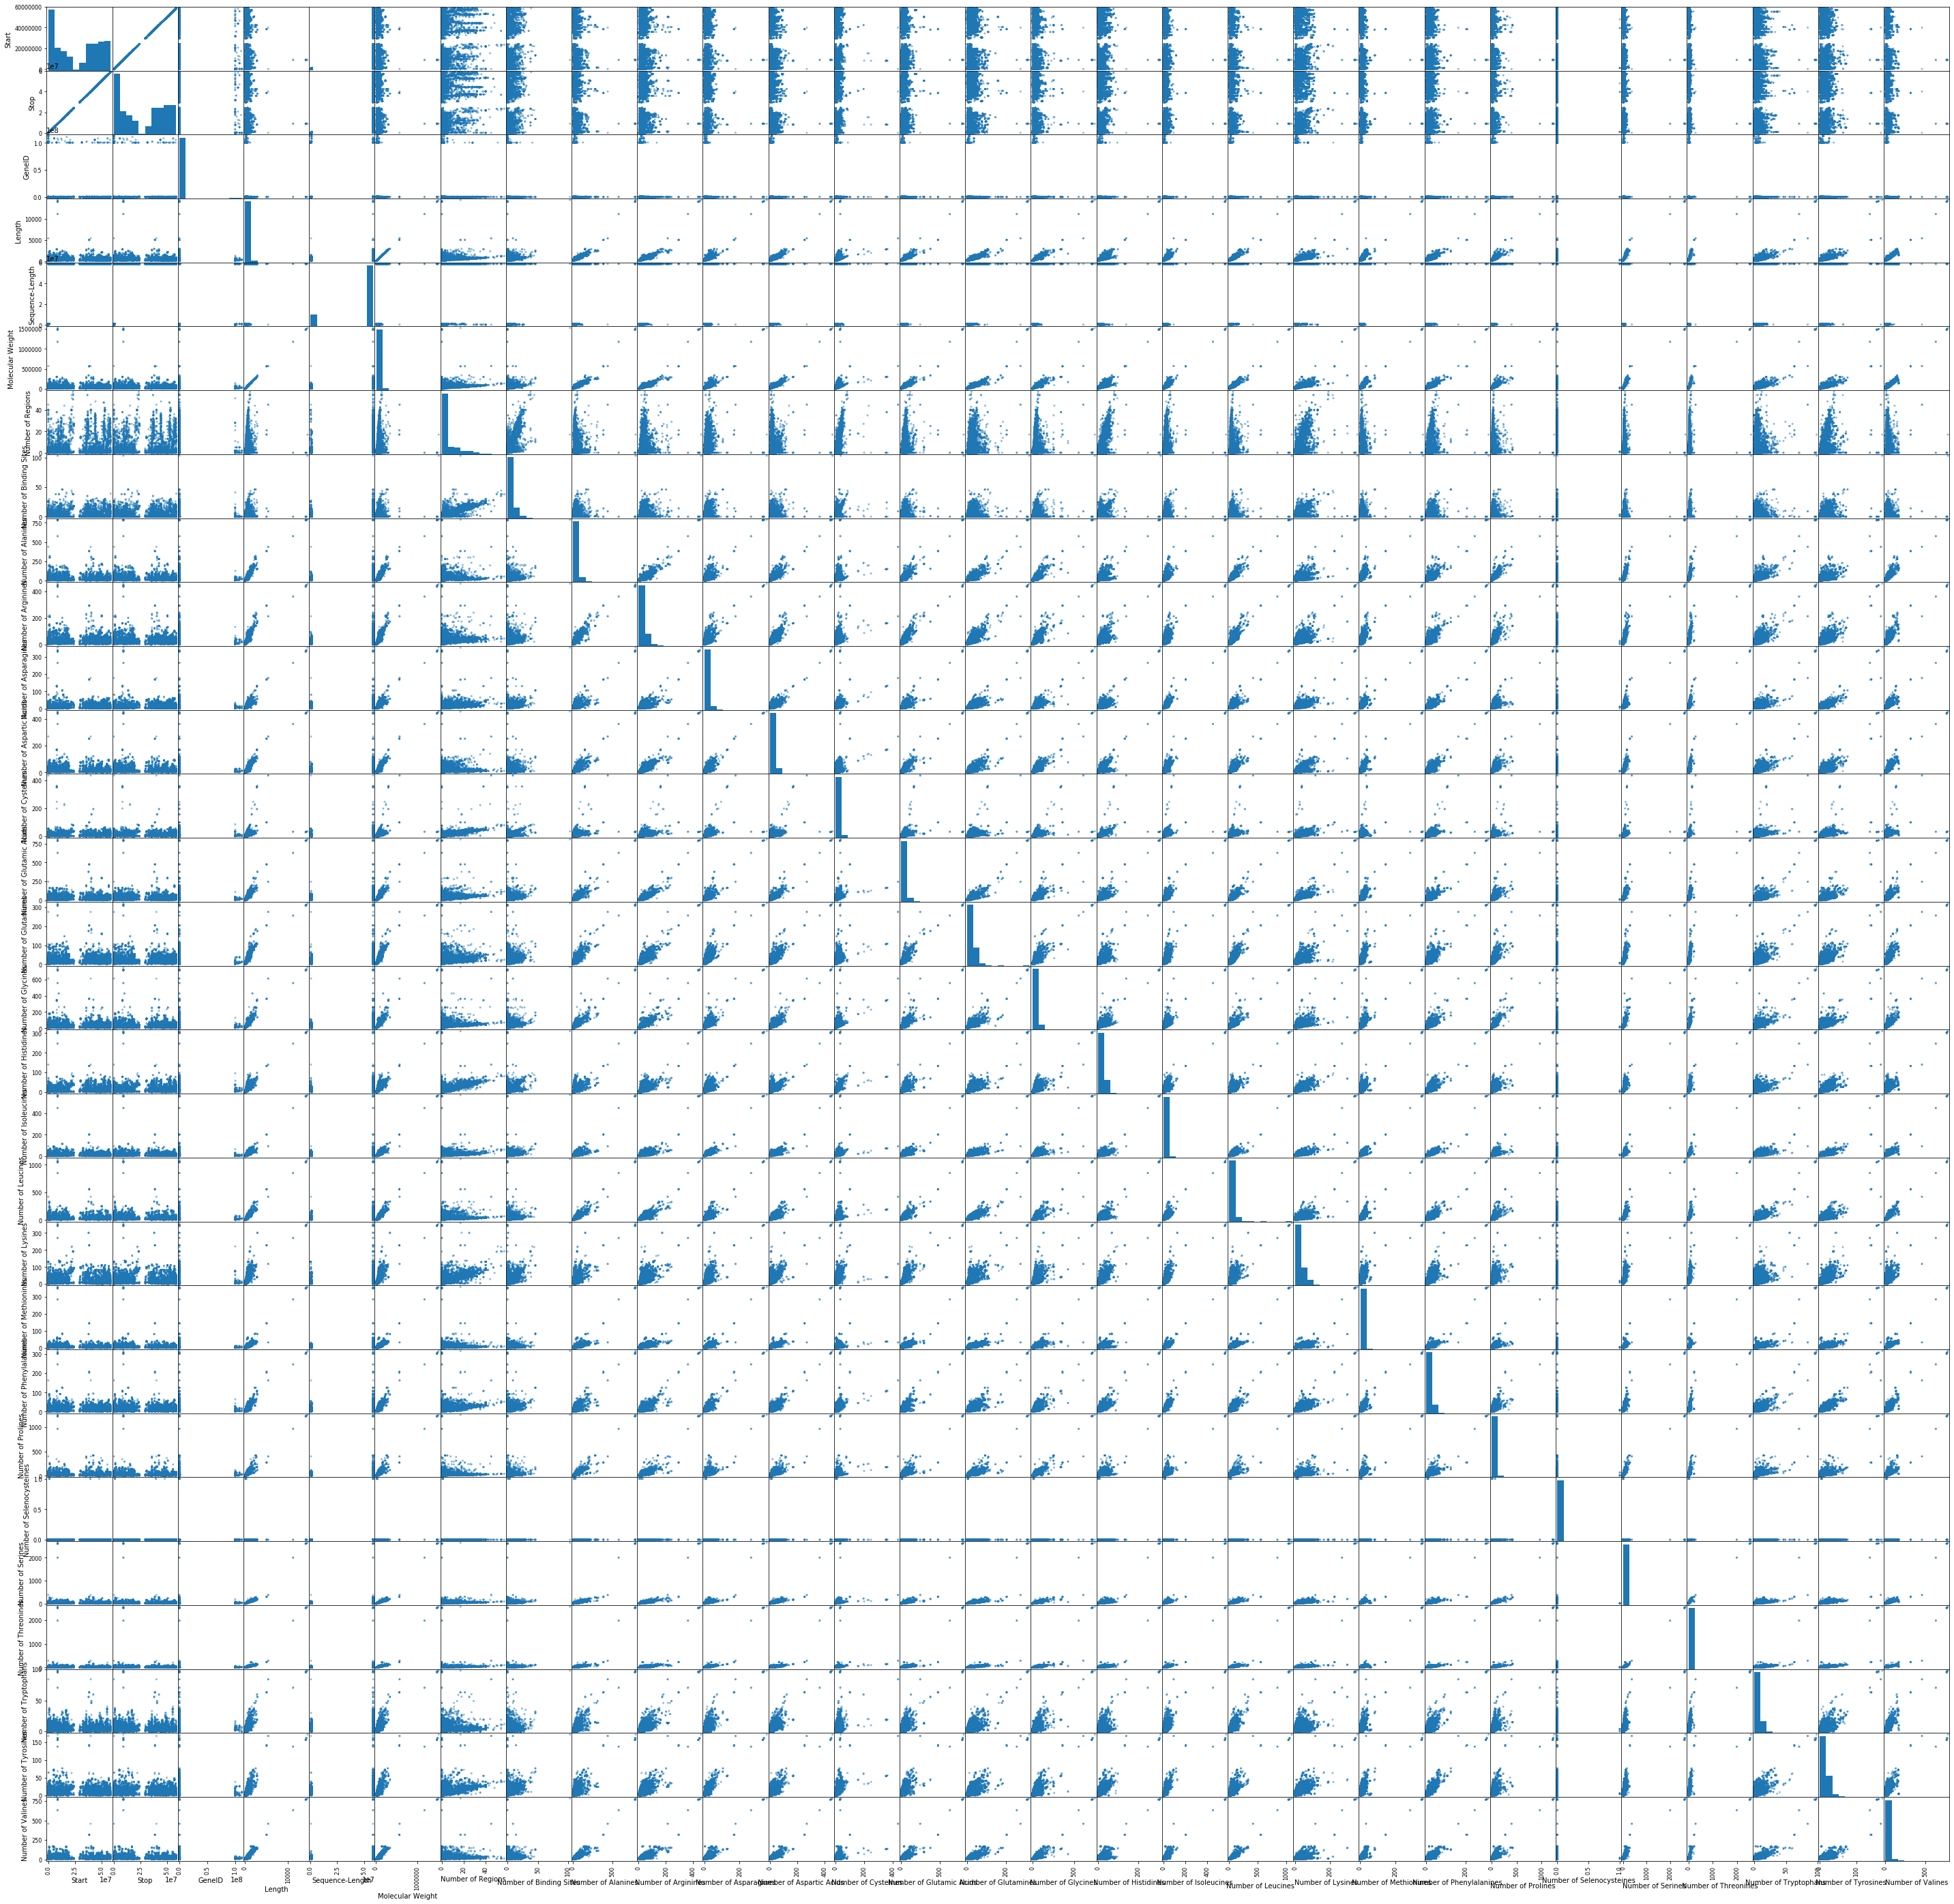

In [45]:
# amino acid feature initial visualization
pd.plotting.scatter_matrix(df, figsize=(50,50));

<a href='#Feature Development'>Back to subtopic Feature Development</a>

### Length of Amino Acids and Molecular Weight Feature Development<a id='Length of Amino Acids and Molecular Weight Feature Development'></a>

In [46]:
# length features (weight features are in cell expansion)
df['Length by Weight'] = df['Molecular Weight'] / df['Length']
df['Length by Regions'] = df['Number of Regions'] / df['Length'] 
df['Length by Sites'] = df['Number of Binding Sites'] / df['Length']
df['Length by Alanines'] = df['Number of Alanines'] / df['Length']
df['Length by Arginines'] = df['Number of Arginines'] / df['Length']
df['Length by Asparagines'] = df['Number of Asparagines'] / df['Length']
df['Length by Aspartic Acids'] = df['Number of Aspartic Acids'] / df['Length']
df['Length by Cysteines'] = df['Number of Cysteines'] / df['Length']
df['Length by Glutamic Acids'] = df['Number of Glutamic Acids'] / df['Length']
df['Length by Glutamines'] = df['Number of Glutamines'] / df['Length']
df['Length by Glycines'] = df['Number of Glycines'] / df['Length']
df['Length by Histidines'] = df['Number of Histidines'] / df['Length']
df['Length by Isoleucines'] = df['Number of Isoleucines'] / df['Length']
df['Length by Leucines'] = df['Number of Leucines'] / df['Length']
df['Length by Lysines'] = df['Number of Lysines'] / df['Length']
df['Length by Methionines'] = df['Number of Methionines'] / df['Length']
df['Length by Phenylalanines'] = df['Number of Phenylalanines'] / df['Length']
df['Length by Prolines'] = df['Number of Prolines'] / df['Length']
df['Length by Selenocysteines'] = df['Number of Selenocysteines'] / df['Length']
df['Length by Serines'] = df['Number of Serines'] / df['Length']
df['Length by Threonines'] = df['Number of Threonines'] / df['Length']
df['Length by Tryptophans'] = df['Number of Tryptophans'] / df['Length']
df['Length by Tyrosines'] = df['Number of Tyrosines'] / df['Length']
df['Length by Valines'] = df['Number of Valines'] / df['Length']
# weight features
df['Weight by Regions'] = df['Number of Regions'] / df['Molecular Weight']
df['Weight by Sites'] = df['Number of Binding Sites'] / df['Molecular Weight']
df['Weight by Alanines'] = df['Number of Alanines'] / df['Molecular Weight']
df['Weight by Arginines'] = df['Number of Arginines'] / df['Molecular Weight']
df['Weight by Asparagines'] = df['Number of Asparagines'] / df['Molecular Weight']
df['Weight by Aspartic Acids'] = df['Number of Aspartic Acids'] / df['Molecular Weight']
df['Weight by Cysteines'] = df['Number of Cysteines'] / df['Molecular Weight']
df['Weight by Glutamic Acids'] = df['Number of Glutamic Acids'] / df['Molecular Weight']
df['Weight by Glutamines'] = df['Number of Glutamines'] / df['Molecular Weight']
df['Weight by Glycines'] = df['Number of Glycines'] / df['Molecular Weight']
df['Weight by Histidines'] = df['Number of Histidines'] / df['Molecular Weight']
df['Weight by Isoleucines'] = df['Number of Isoleucines'] / df['Molecular Weight']
df['Weight by Leucines'] = df['Number of Leucines'] / df['Molecular Weight']
df['Weight by Lysines'] = df['Number of Lysines'] / df['Molecular Weight']
df['Weight by Methionines'] = df['Number of Methionines'] / df['Molecular Weight']
df['Weight by Phenylalanines'] = df['Number of Phenylalanines'] / df['Molecular Weight']
df['Weight by Prolines'] = df['Number of Prolines'] / df['Molecular Weight']
df['Weight by Selenocysteines'] = df['Number of Selenocysteines'] / df['Molecular Weight']
df['Weight by Serines'] = df['Number of Serines'] / df['Molecular Weight']
df['Weight by Threonines'] = df['Number of Threonines'] / df['Molecular Weight']
df['Weight by Tryptophans'] = df['Number of Tryptophans'] / df['Molecular Weight']
df['Weight by Tyrosines'] = df['Number of Tyrosines'] / df['Molecular Weight']
df['Weight by Valines'] = df['Number of Valines'] / df['Molecular Weight']
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Weight by Lysines,Weight by Methionines,Weight by Phenylalanines,Weight by Prolines,Weight by Selenocysteines,Weight by Serines,Weight by Threonines,Weight by Tryptophans,Weight by Tyrosines,Weight by Valines
507,19,3728433,3750684,positive,27134,TJP3,NP_001254489.1,919,tight junction protein ZO-3 isoform 1,19,...,0.000316,0.000138,0.000217,0.000622,0.0,0.000918,0.000395,0.000099,0.000178,0.000553
4119,19,41847429,41851696,positive,63946,DMRTC2,XP_016882616.1,418,doublesex- and mab-3-related transcription fac...,19,...,0.000359,0.000112,0.000202,0.001546,0.0,0.000740,0.000426,0.000179,0.000045,0.000448
3888,19,40422836,40423546,negative,29950,SERTAD1,NP_037508.2,236,SERTA domain-containing protein 1,19,...,0.000285,0.000203,0.000081,0.001058,0.0,0.000895,0.000203,0.000122,0.000081,0.000448
4065,19,41618100,41626963,negative,1089,CEACAM4,XP_016881702.1,183,carcinoembryonic antigen-related cell adhesion...,19,...,0.000107,0.000054,0.000161,0.001499,0.0,0.001017,0.000589,0.000161,0.000054,0.000482
658,19,5032891,5088207,positive,23030,KDM4B,XP_011526124.1,312,lysine-specific demethylase 4B isoform X8,19,...,0.000506,0.000253,0.000534,0.000506,0.0,0.000506,0.000562,0.000197,0.000506,0.000309


In [47]:
# check for nans
df.isna().sum().sum()

0

In [48]:
# check for infinite numbers
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Sequence-Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Selenocysteines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Proline

In [49]:
# length and weight features basic statistics 
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Weight by Lysines,Weight by Methionines,Weight by Phenylalanines,Weight by Prolines,Weight by Selenocysteines,Weight by Serines,Weight by Threonines,Weight by Tryptophans,Weight by Tyrosines,Weight by Valines
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,0.000470,0.000175,0.000331,0.000653,4.359212e-08,0.000763,0.000494,0.000129,0.000242,0.000516
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,0.000276,0.000097,0.000127,0.000325,1.649044e-06,0.000234,0.000166,0.000085,0.000112,0.000190
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000017,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,0.000269,0.000108,0.000241,0.000390,0.000000e+00,0.000598,0.000389,0.000064,0.000161,0.000384
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,0.000387,0.000159,0.000330,0.000610,0.000000e+00,0.000742,0.000475,0.000117,0.000243,0.000511
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,0.000635,0.000219,0.000415,0.000850,0.000000e+00,0.000904,0.000586,0.000174,0.000313,0.000643
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,0.002011,0.001058,0.001305,0.002644,1.073307e-04,0.002356,0.001707,0.000852,0.000729,0.001342


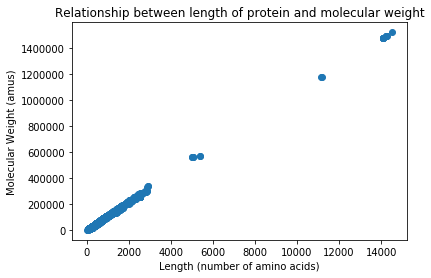

In [50]:
# initial visualization for length and weight features
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Length'], df['Molecular Weight'])
plt.ylabel('Molecular Weight (amus)')
plt.xlabel('Length (number of amino acids)')
plt.title('Relationship between length of protein and molecular weight');

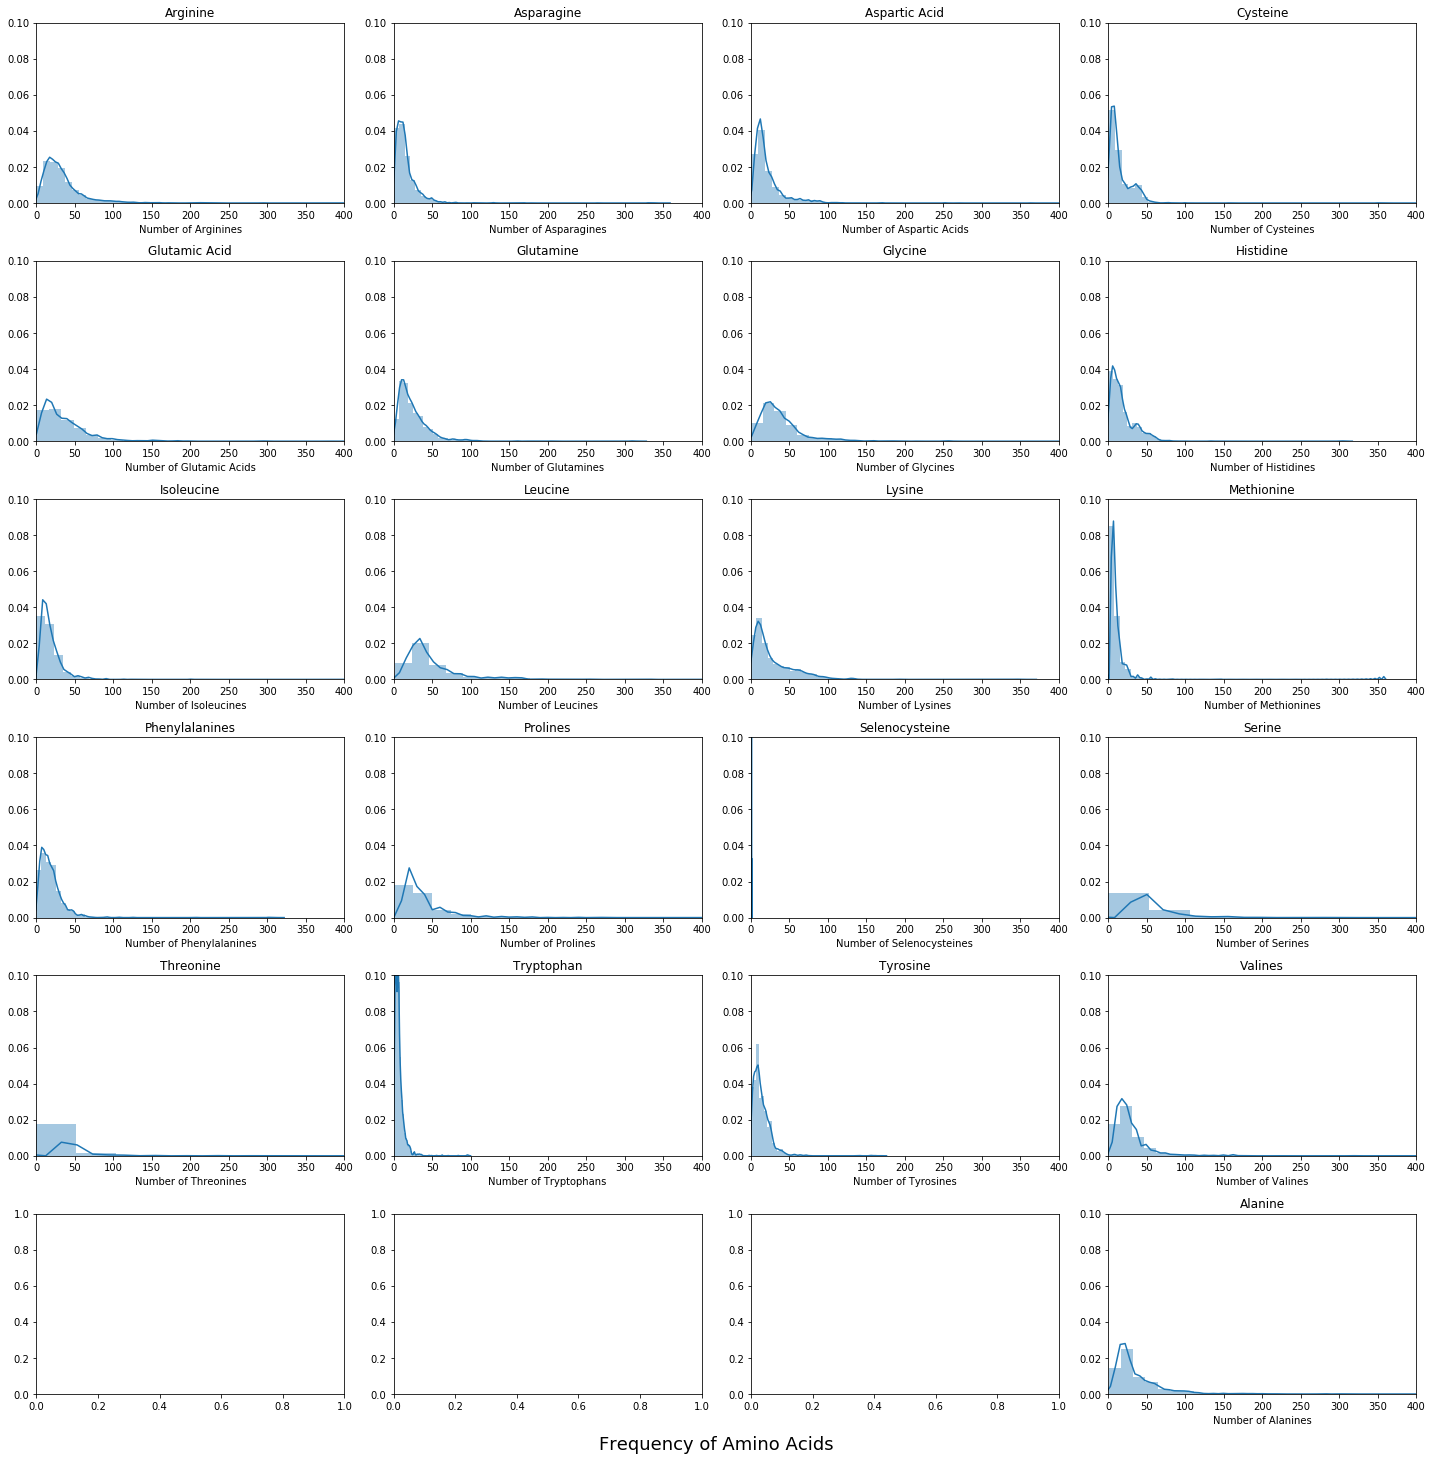

In [51]:
# additional visualization for length feature
amino_acids_data = [df['Number of Alanines'], df['Number of Arginines'], df['Number of Asparagines'], 
                    df['Number of Aspartic Acids'], df['Number of Cysteines'], df['Number of Glutamic Acids'], 
                    df['Number of Glutamines'], df['Number of Glycines'], df['Number of Histidines'], 
                    df['Number of Isoleucines'], df['Number of Leucines'], df['Number of Lysines'],
                    df['Number of Methionines'], df['Number of Phenylalanines'], df['Number of Prolines'], 
                    df['Number of Selenocysteines'], df['Number of Serines'], df['Number of Threonines'], 
                    df['Number of Tryptophans'], df['Number of Tyrosines'], df['Number of Valines']]
amino_acids_names = ['Alanine', 'Arginine', 'Asparagine',  'Aspartic Acid', 'Cysteine', 'Glutamic Acid', 'Glutamine', 
                     'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanines', 'Prolines',
                     'Selenocysteine', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valines']
fig00, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for n in range(0, len(amino_acids_names)):
    row = (n-1)//4
    col = n%4-1
    ax = axes[row][col]
    sns.distplot(amino_acids_data[n], ax=ax).set_xlim(left=0, right=400)
    ax.set_ylim(top=0.1)
    ax.set_title('{}'.format(amino_acids_names[n]), fontsize=12)
fig00.suptitle('Frequency of Amino Acids', y=0, horizontalalignment='center', fontsize=18)
plt.tight_layout();

<a href='#Feature Development'>Back to subtopic Feature Development</a>

### Amino Acid Weight Feature Development<a id='Amino Acid Weight Feature Development'></a>

In [52]:
# amino acid weight contribution
df['Weight of Alanines'] = df['Number of Alanines'] * amino_acid_info.loc[0,'Weight']
df['Weight of Arginines'] = df['Number of Arginines'] * amino_acid_info.loc[1,'Weight']
df['Weight of Asparagines'] = df['Number of Asparagines'] * amino_acid_info.loc[2,'Weight']
df['Weight of Aspartic Acids'] = df['Number of Aspartic Acids'] * amino_acid_info.loc[3,'Weight']
df['Weight of Cysteines'] = df['Number of Cysteines'] * amino_acid_info.loc[4,'Weight']
df['Weight of Glutamic Acids'] = df['Number of Glutamic Acids'] * amino_acid_info.loc[5,'Weight']
df['Weight of Glutamines'] = df['Number of Glutamines'] * amino_acid_info.loc[6,'Weight']
df['Weight of Glycines'] = df['Number of Glycines'] * amino_acid_info.loc[7,'Weight']
df['Weight of Histidines'] = df['Number of Histidines'] * amino_acid_info.loc[8,'Weight']
df['Weight of Isoleucines'] = df['Number of Isoleucines'] * amino_acid_info.loc[9,'Weight']
df['Weight of Leucines'] = df['Number of Leucines'] * amino_acid_info.loc[10,'Weight']
df['Weight of Lysines'] = df['Number of Lysines'] * amino_acid_info.loc[11,'Weight']
df['Weight of Methionines'] = df['Number of Methionines'] * amino_acid_info.loc[12,'Weight']
df['Weight of Phenylalanines'] = df['Number of Phenylalanines'] * amino_acid_info.loc[13,'Weight']
df['Weight of Prolines'] = df['Number of Prolines'] * amino_acid_info.loc[14,'Weight']
df['Weight of Selenocysteines'] = df['Number of Selenocysteines'] * amino_acid_info.loc[15,'Weight']
df['Weight of Serines'] = df['Number of Serines'] * amino_acid_info.loc[16,'Weight']
df['Weight of Threonines'] = df['Number of Threonines'] * amino_acid_info.loc[17,'Weight']
df['Weight of Tryptophans'] = df['Number of Tryptophans'] * amino_acid_info.loc[18,'Weight']
df['Weight of Tyrosines'] = df['Number of Tyrosines'] * amino_acid_info.loc[19,'Weight']
df['Weight of Valines'] = df['Number of Valines'] * amino_acid_info.loc[20,'Weight']

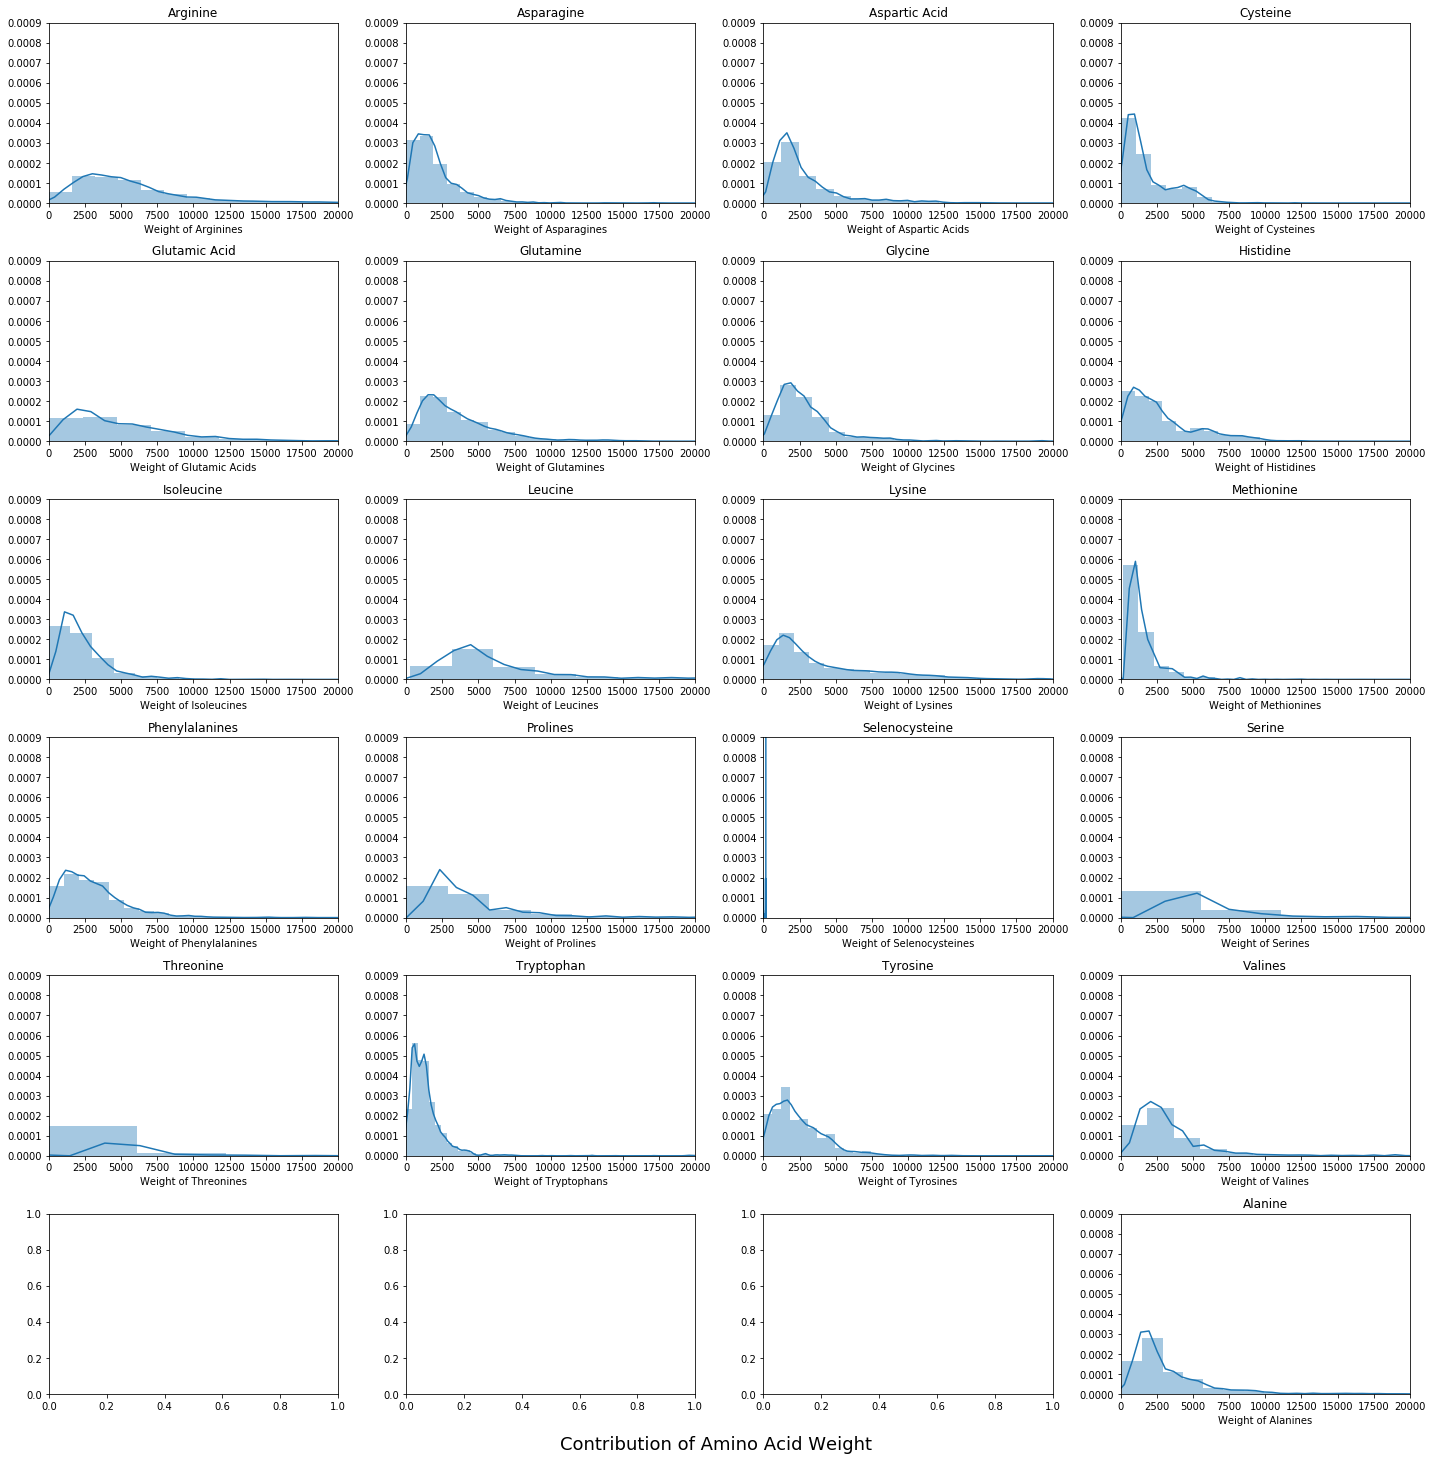

In [53]:
# additional visualization for amino acid weight contribution
amino_acids_weight_data = [df['Weight of Alanines'], df['Weight of Arginines'], df['Weight of Asparagines'], 
                           df['Weight of Aspartic Acids'], df['Weight of Cysteines'], df['Weight of Glutamic Acids'], 
                           df['Weight of Glutamines'], df['Weight of Glycines'], df['Weight of Histidines'], 
                           df['Weight of Isoleucines'], df['Weight of Leucines'], df['Weight of Lysines'],
                           df['Weight of Methionines'], df['Weight of Phenylalanines'], df['Weight of Prolines'], 
                           df['Weight of Selenocysteines'], df['Weight of Serines'], df['Weight of Threonines'], 
                           df['Weight of Tryptophans'], df['Weight of Tyrosines'], df['Weight of Valines']]
amino_acids_names = ['Alanine', 'Arginine', 'Asparagine',  'Aspartic Acid', 'Cysteine', 'Glutamic Acid', 'Glutamine', 
                     'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanines', 'Prolines',
                     'Selenocysteine', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valines']
fig00, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for n in range(0, len(amino_acids_names)):
    row = (n-1)//4
    col = n%4-1
    ax = axes[row][col]
    sns.distplot(amino_acids_weight_data[n], ax=ax).set_xlim(left=0, right=20000)
    ax.set_ylim(top=0.0009)
    ax.set_title('{}'.format(amino_acids_names[n]), fontsize=12)
fig00.suptitle('Contribution of Amino Acid Weight', y=0, horizontalalignment='center', fontsize=18)
plt.tight_layout();

<a href='#Feature Development'>Back to subtopic Feature Development</a>

### Addtional Squared and Cubed Values<a id='Additional Squared and Cubed Values'></a>

In [54]:
# identifing necessary indexers
for i, j in enumerate(df.columns):
    print(i)
    print(j)

0
#Replicon Name
1
Start
2
Stop
3
Strand
4
GeneID
5
Locus
6
Protein product
7
Length
8
Protein name
9
# Sequence-Name
10
Sequence-Role
11
RefSeq-Accn
12
Assembly-Unit
13
Sequence-Length
14
UCSC-style-name
15
Accession Version
16
Molecular Weight
17
Number of Regions
18
Number of Binding Sites
19
Sequence
20
Number of Alanines
21
Number of Arginines
22
Number of Asparagines
23
Number of Aspartic Acids
24
Number of Cysteines
25
Number of Glutamic Acids
26
Number of Glutamines
27
Number of Glycines
28
Number of Histidines
29
Number of Isoleucines
30
Number of Leucines
31
Number of Lysines
32
Number of Methionines
33
Number of Phenylalanines
34
Number of Prolines
35
Number of Selenocysteines
36
Number of Serines
37
Number of Threonines
38
Number of Tryptophans
39
Number of Tyrosines
40
Number of Valines
41
Length by Weight
42
Length by Regions
43
Length by Sites
44
Length by Alanines
45
Length by Arginines
46
Length by Asparagines
47
Length by Aspartic Acids
48
Length by Cysteines
49
Lengt

In [55]:
# grab only desired continuous data
continuous = list(df.columns[16:19]) + list(df.columns[20:])
continuous

['Molecular Weight',
 'Number of Regions',
 'Number of Binding Sites',
 'Number of Alanines',
 'Number of Arginines',
 'Number of Asparagines',
 'Number of Aspartic Acids',
 'Number of Cysteines',
 'Number of Glutamic Acids',
 'Number of Glutamines',
 'Number of Glycines',
 'Number of Histidines',
 'Number of Isoleucines',
 'Number of Leucines',
 'Number of Lysines',
 'Number of Methionines',
 'Number of Phenylalanines',
 'Number of Prolines',
 'Number of Selenocysteines',
 'Number of Serines',
 'Number of Threonines',
 'Number of Tryptophans',
 'Number of Tyrosines',
 'Number of Valines',
 'Length by Weight',
 'Length by Regions',
 'Length by Sites',
 'Length by Alanines',
 'Length by Arginines',
 'Length by Asparagines',
 'Length by Aspartic Acids',
 'Length by Cysteines',
 'Length by Glutamic Acids',
 'Length by Glutamines',
 'Length by Glycines',
 'Length by Histidines',
 'Length by Isoleucines',
 'Length by Leucines',
 'Length by Lysines',
 'Length by Methionines',
 'Length by Phe

In [56]:
# generate squared and cubed terms
polynomial_terms = [2,3]
for term in polynomial_terms:
    df['Length**'+str(term)] = df['Length']**term 
for cont in continuous:
    for term in polynomial_terms:
        df[cont+'**'+str(term)] = df[cont]**term
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
3695,19,39100611,39110118,positive,390928,ACP7,XP_016882297.1,218,acid phosphatase type 7 isoform X5,19,...,1334025,1540798875,906304,862801408,2663424,4346707968,6421156,16271209304,2683044,4394826072
3899,19,40490096,40575569,positive,57731,SPTBN4,XP_016882539.1,2450,"spectrin beta chain, non-erythrocytic 4 isofor...",19,...,183467025,2485060853625,63568729,506833476317,88059456,826349935104,35676729,213097102317,272151009,4489675195473
1016,19,7916268,7919089,positive,100507588,TGFBR3L,XP_011525912.1,435,transforming growth factor-beta receptor type ...,19,...,11289600,37933056000,4588164,9827847288,9363600,28652616000,0,0,7884864,22140698112
4562,19,44644097,44661811,positive,5817,PVR,NP_006496.4,417,poliovirus receptor isoform alpha precursor,19,...,15920100,63521199000,13608721,50202571769,4161600,8489664000,3964081,7892485271,21902400,102503232000
4094,19,41835821,41839285,negative,147719,LYPD4,XP_024307143.1,241,ly6/PLAUR domain-containing protein 4 isoform X5,19,...,9272025,28233316125,3625216,6902411264,166464,67917312,1179396,1280824056,3080025,5405443875


In [57]:
# squared and cubed values basic statistics
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,1.476312e+08,3.120884e+13,1.559955e+08,4.093666e+13,3.756917e+06,2.431349e+10,1.143370e+07,1.054670e+11,3.157250e+07,1.335664e+12
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,2.881577e+09,7.816783e+14,3.468645e+09,1.030384e+15,1.716183e+07,3.045903e+11,4.181545e+07,1.110292e+12,3.210278e+08,2.815048e+13
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,5.336100e+06,1.232639e+10,2.775556e+06,4.624076e+09,3.745440e+05,2.292209e+08,1.179396e+06,1.280824e+09,3.080025e+06,5.405444e+09
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,1.428840e+07,5.401015e+10,7.491169e+06,2.050333e+10,1.040400e+06,1.061208e+09,3.964081e+06,7.892485e+09,6.625476e+06,1.705398e+10
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,3.335062e+07,1.925999e+11,1.734722e+07,7.225119e+10,2.663424e+06,4.346708e+09,1.182672e+07,4.067209e+10,1.582448e+07,6.294980e+10
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,7.724786e+10,2.146989e+16,9.360479e+10,2.863829e+16,3.996801e+08,7.990404e+12,9.579644e+08,2.964996e+13,8.392575e+09,7.688522e+14


In [58]:
# check for nans in squared and cubed terms
df.isna().sum().sum()

0

In [59]:
# check for infinite values in squared and cubed terms
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Sequence-Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Selenocysteines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Proline

<a href='#Feature Development'>Back to subtopic Feature Development</a>

<a href='#Explore the Data'>Back to section Explore the Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# References<a id='References'></a>
1. https://www.ncbi.nlm.nih.gov/books/NBK1528/table/app3.T.amino_acid_abbreviations/ # amino acid codes
2. https://www.ddbj.nig.ac.jp/ddbj/code-e.html # amino acid code u
3. https://en.wikipedia.org/wiki/Selenocysteine # atomic weight for amino acid code u
4. https://www.promega.com/~/media/files/resources/technical%20references/amino%20acid%20abbreviations%20and%20molecular%20weights.pdf # amino acid info

<a href='#Table of Contents'>Back to Table of Contents</a>

# Future Work<a id='Future Work'></a>

In [61]:
# save developed features for use in other notebooks
df.to_csv('developed features 19.csv')

<a href='#Table of Contents'>Back to Table of Contents</a>